# LECTURE 4 - CLASSIFICATION

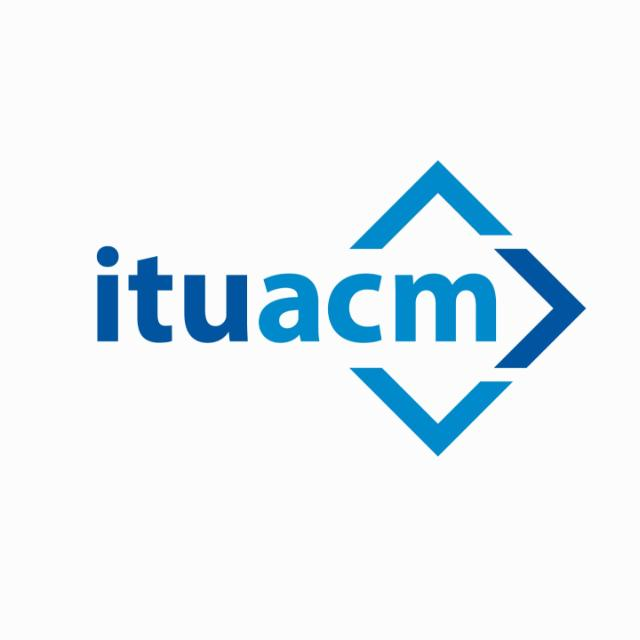

# What is Classification?

Classification is a type of supervised learning where the goal is to assign labels to input data points. Unlike regression, which predicts continuous values, classification predicts discrete labels.

### Examples of Classification Tasks:
- Identifying spam emails (Spam vs. Not Spam).
- Diagnosing diseases (Healthy vs. Diseased).
- Image recognition (Cat, Dog, Bird).

The target variable is categorical, and the output can have two or more classes:
- **Binary Classification:** Two classes (e.g., Yes/No).
- **Multiclass Classification:** More than two classes (e.g., Dog/Cat/Bird).


# Linear Classifiers

Linear classifiers separate data points using a linear decision boundary. They work well for linearly separable data and form the basis of many classification algorithms.

### Key Concepts:
1. **Decision Boundary:** A line (or hyperplane) that divides the feature space into regions for each class.
2. **Linear Equation:** 
   The decision boundary can be represented as:
   $$
   w_1x_1 + w_2x_2 + \dots + w_nx_n + b = 0
   $$
   where $w_i$ are weights and $b$ is the bias term.

### Limitations:
- Struggles with non-linearly separable data.
- Sensitive to outliers.


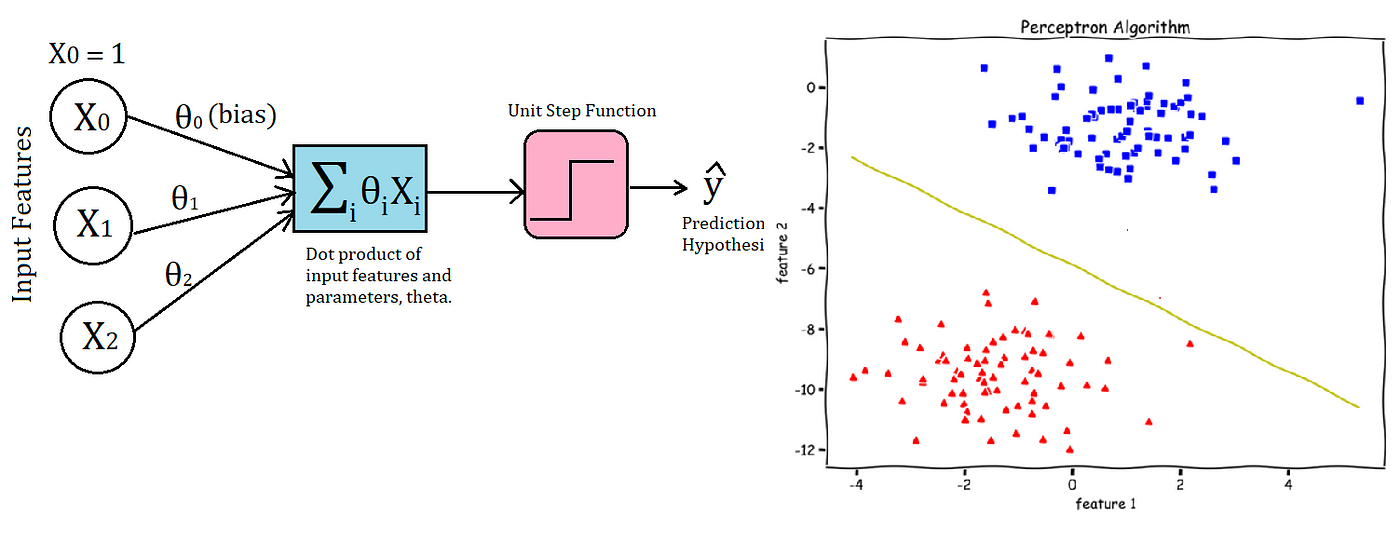

---

### Code Example: Perceptron for Binary Classification

Accuracy: 1.00


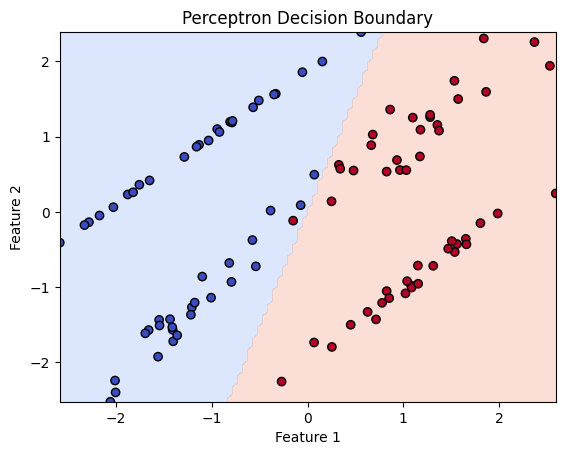

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42
)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = perceptron.decision_function(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs > 0, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Logistic Regression

Logistic Regression is a statistical model used for binary classification. Despite its name, it is a classification algorithm, not a regression algorithm.

### Logistic Function:
The logistic function maps any real-valued number into the range [0, 1], making it suitable for probability estimation:
$$
f(x) = \frac{1}{1 + e^{-z}}
$$
where $z = w^T x + b$.

### Probability Interpretation:
- If $f(x) \geq 0.5$, predict class 1.
- If $f(x) < 0.5$, pre:\n", confusion_matrix(y_test, y_pred))


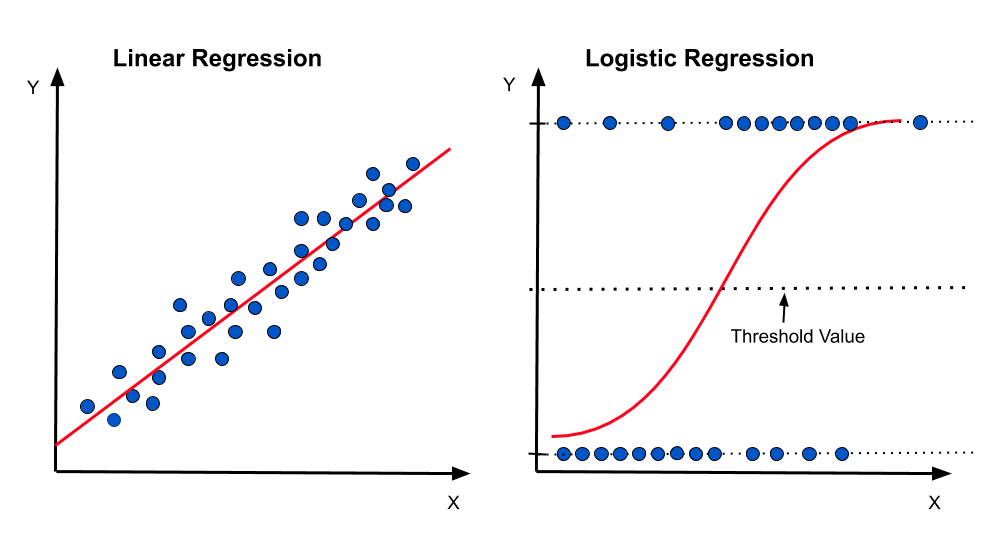

---

### Code Example: Logistic Regression on Iris Dataset

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[12  0]
 [ 0  8]]
Accuracy: 1.00


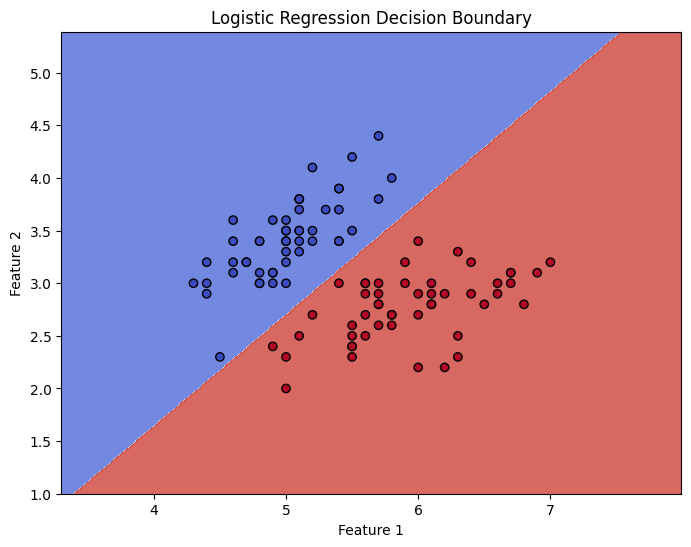

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Use only two classes for binary classification and select only 2 features
X = X[y < 2, :2]  # Filter only classes 0 and 1, and select first 2 features
y = y[y < 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Visualizing decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = log_reg.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="coolwarm")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
